<a href="https://colab.research.google.com/github/mdaugherity/Numerical2022/blob/main/calc/Week_7_Derivatives.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# How to find derivatives with numpy and scipy

# Functions 
Use *scipy.misc.derivative* with a small dx

https://docs.scipy.org/doc/scipy/reference/generated/scipy.misc.derivative.html#scipy.misc.derivative 

In [ ]:
from scipy.misc import derivative

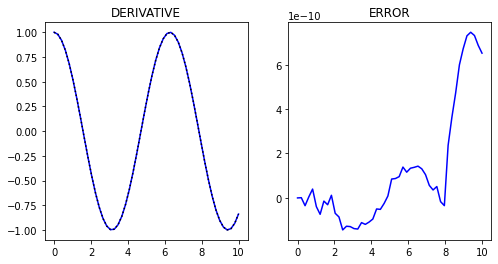

In [ ]:
def f(x):   # the function to differentiate
  return np.sin(x)

x = np.linspace(0,10)
df_true = np.cos(x)
df = derivative(f,x,dx=1e-6)

plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.plot(x, df, 'b-')
plt.plot(x, df_true,'k:',label='true')
plt.title('DERIVATIVE')

plt.subplot(1,2,2)
plt.plot(x, df-df_true, 'b-')
plt.title('ERROR')

plt.show()

How does dx affect error?

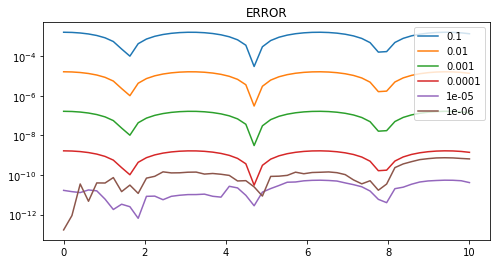

In [ ]:
def f(x):   # the function to differentiate
  return np.sin(x)

x = np.linspace(0,10)
df_true = np.cos(x)

plt.figure(figsize=(8,4))

EXPLIST = np.arange(-1, -7, -1)   # exponents for dx
for e in EXPLIST:
  dx = 10.0**e
  df = derivative(f,x,dx)

  plt.semilogy(x, np.abs(df-df_true), label=dx)
  plt.title('ERROR')

plt.legend(loc='upper right')
plt.show()

# Data Points 

## np.gradient 
Quick way to get a centered-difference derivative of an array

https://numpy.org/doc/stable/reference/generated/numpy.gradient.html 

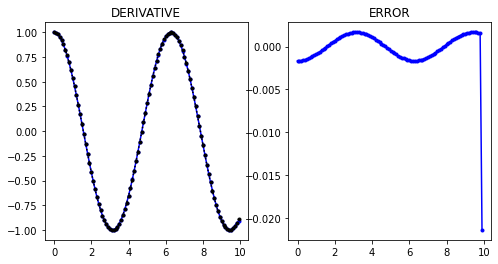

In [ ]:
dx = 0.1
xdata = np.arange(0, 10, dx)
ydata = np.sin(xdata)

df_true = np.cos(xdata)
df = np.gradient(ydata,dx)

plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.plot(xdata, df, 'b.-')
plt.plot(xdata, df_true,'k:.',label='true')
plt.title('DERIVATIVE')

plt.subplot(1,2,2)
plt.plot(xdata, df-df_true, 'b.-')
plt.title('ERROR')

plt.show()

## Cubic Spline Interpolation
Use the *UnivariateSpline* class for cubic spline interpolation. Then derivatives (and integrals) are easy

Notes:
* *interp1d* will do splines, but it doesn't give the coefficients.  This is why we use UnivariateSpline
* This class is designed to smooth (fit) the data, MUST GIVE **s=0** to actually go through every point! 

https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.UnivariateSpline.html#scipy.interpolate.UnivariateSpline 

In [ ]:
from scipy.interpolate import UnivariateSpline

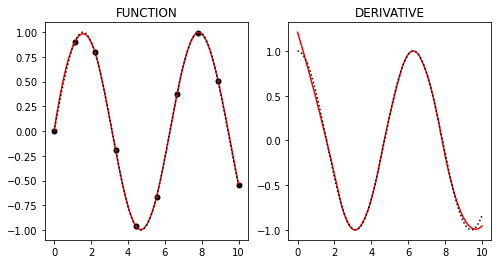

In [ ]:
xdata = np.linspace(0, 10, 10)  # make data points
ydata = np.sin(xdata)

spl = UnivariateSpline(xdata, ydata,s=0) # don't forget s=0
xs = np.linspace(0, 10, 200)
df = spl.derivative() # use df(x) to get derivative at any x


plt.figure(figsize=(8,4))

plt.subplot(1,2,1)
plt.plot(xdata, ydata, 'ko', ms=5)
plt.plot(xs, spl(xs), 'r-')
plt.plot(xs, np.sin(xs),'k:',label='true')
plt.title('FUNCTION')

plt.subplot(1,2,2)
plt.plot(xs, df(xs), 'r-')
plt.plot(xs, np.cos(xs),'k:',label='true')
plt.title('DERIVATIVE')
plt.show()